In [1]:
from utils.plot_shp import plot_shapefiles
from utils.crop_raster import crop_tif
import geopandas as gpd
import rasterio
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

## Global geoboundaries

/Users/mia694/Github/nsaph-data-processing/climate_types_raster2polygon/madagascar/utils/plot_shp.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


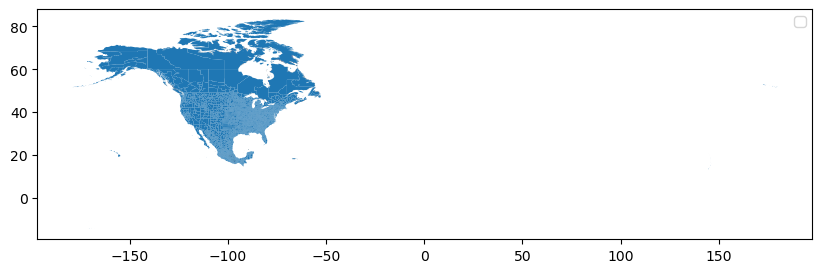

In [2]:
plot_shapefiles('data/example')

In [3]:
# Read the shapefile
shapefile = gpd.read_file('data/example/CAN_ADM2/CAN_ADM2.shp')
shapefile.columns

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')

In [4]:
shapefile.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Avalon Peninsula,None,811477B25825438233887,CAN,ADM2,"MULTIPOLYGON (((-54.07905 47.88161, -54.06853 ..."
1,South Coast--Burin Peninsula *,None,811477B14604882174662,CAN,ADM2,"MULTIPOLYGON (((-53.97400 47.95855, -53.98035 ..."
2,West Coast--Northern Peninsul*,None,811477B46540851018078,CAN,ADM2,"MULTIPOLYGON (((-57.38431 54.14924, -57.38932 ..."
3,Notre Dame--Central Bonavista*,None,811477B90164277950663,CAN,ADM2,"MULTIPOLYGON (((-53.81009 47.90674, -53.80704 ..."
4,Prince Edward Island / Île-du,None,811477B18636492208722,CAN,ADM2,"MULTIPOLYGON (((-61.98301 46.45775, -61.97368 ..."


In [5]:
# Read the shapefile
shapefile = gpd.read_file('data/example/MEX_ADM2/MEX_ADM2.shp')
shapefile.columns

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')

In [6]:
shapefile.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Jesús María,None,50627088B43766130092771,MEX,ADM2,"POLYGON ((-102.31034 22.03716, -102.30653 22.0..."
1,San Francisco de los Romo,None,50627088B17251995909944,MEX,ADM2,"POLYGON ((-102.27880 21.95841, -102.27831 21.9..."
2,Aguascalientes,None,50627088B6632860871958,MEX,ADM2,"POLYGON ((-102.54085 21.80636, -102.53997 21.8..."
3,San José de Gracia,None,50627088B86600240710870,MEX,ADM2,"POLYGON ((-102.41659 22.04043, -102.41627 22.0..."
4,Rincón de Romos,None,50627088B44268197461016,MEX,ADM2,"POLYGON ((-102.35385 22.12064, -102.36056 22.1..."


In [7]:
# Read the shapefile
shapefile = gpd.read_file('data/example/USA_ADM2/USA_ADM2.shp')
shapefile.columns

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')

In [8]:
shapefile.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Highland,None,52423323B51867153498623,USA,ADM2,"POLYGON ((-83.86568 39.24734, -83.83441 39.245..."
1,Alpine,None,52423323B67588574079428,USA,ADM2,"POLYGON ((-120.07250 38.50987, -120.07240 38.7..."
2,Escambia,None,52423323B97123089850170,USA,ADM2,"POLYGON ((-87.59883 30.99743, -87.57130 30.997..."
3,Lawrence,None,52423323B54167037237770,USA,ADM2,"POLYGON ((-87.90812 38.85011, -87.75960 38.849..."
4,Wayne,None,52423323B18579387327768,USA,ADM2,"POLYGON ((-88.94336 31.82457, -88.91046 31.826..."


## Output

Run the pipeline using example_config with parameters

```
datapaths=example
shapefiles=example
```

In [ ]:
# Read the aggregated climate types file
pq_file = 'data/output/present/climate_types_MEX_ADM2.parquet'
climate_types_df = pq.read_table(pq_file).to_pandas()
climate_types_df.head()

,id,climate_type_short,climate_type_long,Af,Am,Aw,BWh,BWk,BSh,BSk,...,Dwa,Dwb,Dwc,Dwd,Dfa,Dfb,Dfc,Dfd,ET,EF
0,50627088B43766130092771,BSk,"Arid, steppe, cold",0.0,0.0,0.0,0.0,0.0,0.114598,0.687585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50627088B17251995909944,BSk,"Arid, steppe, cold",0.0,0.0,0.0,0.0,0.0,0.090164,0.909836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50627088B6632860871958,BSk,"Arid, steppe, cold",0.0,0.0,0.0,0.0,0.0,0.129190,0.860451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50627088B86600240710870,Cwb,"Temperate, dry winter, warm summer",0.0,0.0,0.0,0.0,0.0,0.000000,0.406172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50627088B44268197461016,BSk,"Arid, steppe, cold",0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
type(climate_types_df.id[0])

str

In [12]:
# Read the shapefile
shapefile_path = 'data/input/shapefiles/MEX_ADM2/MEX_ADM2.shp'
shapefile = gpd.read_file(shapefile_path)
shapefile.rename(columns={'shapeID': 'id'}, inplace=True)

type(shapefile.MEX[0])

AttributeError: 'GeoDataFrame' object has no attribute 'MEX'

<Axes: >

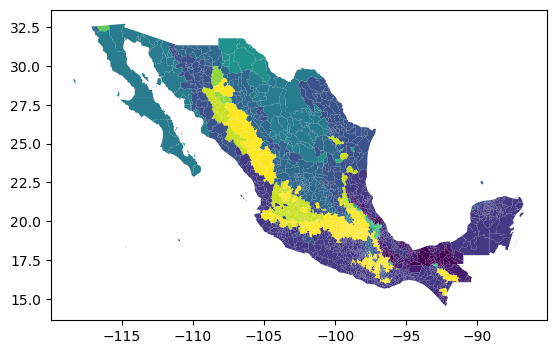

In [13]:
# Merge the shapefile and df based on a common column
merged_data = shapefile.merge(climate_types_df, on='id')
# Plot the merged data
merged_data.plot(column='climate_type_short', cmap='viridis', legend=False)

In [14]:
crop_tif('data/example/MEX_ADM2/MEX_ADM2.shp', 
         'data/input/climate_types/Beck_KG_V1_present_0p0083.tif', 
         'data/example/climate_types_MEX_ADM2.tif')

Raster cropped to data/example/MEX_ADM2/MEX_ADM2.shp and saved as data/example/climate_types_MEX_ADM2.tif


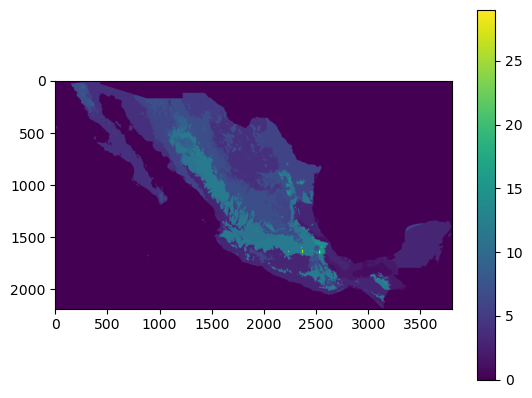

In [15]:
raster_file = 'data/example/climate_types_MEX_ADM2.tif'
raster = rasterio.open(raster_file)

# Read the raster data
raster_data = raster.read(1)

# Plot the raster
plt.imshow(raster_data)
plt.colorbar()
plt.show()